金融工学でよく使われる確率微分方程式（SDE）には、以下のようなものがあります。用途ごとに分類すると理解しやすいです。

1. メジャーなSDEモデル（頻繁に使われる）
これらは 実務や研究で広く使われるモデル です：

- 株価モデル: 幾何ブラウン運動 (GBM), Hestonモデル, Mertonジャンプ拡散
- 金利モデル: Vasicek, CIR, LIBOR市場モデル (BGM)
- ボラティリティモデル: GARCH
- クレジットリスクモデル: Mertonモデル

# **金融工学における確率微分方程式の一覧（用途別分類）**

以下の表は、金融工学でよく使われる確率微分方程式（SDE）を **用途別** に分類し、特徴や応用分野を整理したものです。

## **1. オプション価格付けに使われるモデル**
| **モデル名** | **特徴** | **応用分野** |
|-------------|---------|-------------|
| **Geometric Brownian Motion (GBM)** | 指数関数的な成長、リターンが正規分布に従う | 株価・資産価格のモデリング、オプション価格付け |
| **Merton Jump Diffusion Model** | ジャンプ（急変動）を含む株価モデル | 株価リターンのモデリング、オプション価格付け |
| **Heston Model** | 確率的ボラティリティ、リスク・ニュートラル測度下で解析解がある | オプション価格付け、ボラティリティのモデリング |

## **2. リスク管理・ボラティリティ予測に使われるモデル**
| **モデル名** | **特徴** | **応用分野** |
|-------------|---------|-------------|
| **GARCH Model** | 時間とともに変動するボラティリティを考慮 | リスク管理、ボラティリティの予測 |
| **Ornstein-Uhlenbeck Process (OU Process)** | 平均回帰性を持つ確率過程、ランダムウォークとは異なる性質 | ボラティリティのダイナミクス、リスク評価 |
| **Cox Process (Hawkes Process)** | 自己励起型ポアソン過程、過去のイベントが未来の発生確率を増加 | 高頻度取引のモデリング、信用リスク分析 |

## **3. 金利市場・金利デリバティブに使われるモデル**
| **モデル名** | **特徴** | **応用分野** |
|-------------|---------|-------------|
| **LIBOR Market Model (BGM Model)** | フォワード金利の確率的変動をモデル化 | 金利デリバティブ（スワップ、キャップ、フロア） |
| **Vasicek Model** | 金利が長期平均へ回帰する特性を持つ | 金利モデリング、債券価格評価 |

## **4. 会社の信用リスク評価に使われるモデル**
| **モデル名** | **特徴** | **応用分野** |
|-------------|---------|-------------|
| **Merton Credit Risk Model** | 企業のデフォルト確率を株価の変動から推定 | 信用リスク評価、社債価格付け |

## **5. 外国為替市場・金利裁定に使われるモデル**
| **モデル名** | **特徴** | **応用分野** |
|-------------|---------|-------------|
| **Covered Interest Parity (CIP)** | 為替レートと金利差の間に裁定機会がないことを前提とする | 為替市場、金利裁定取引 |

この表は、金融市場における確率微分方程式の理解を深めるための参考資料となります。

金融工学の確率モデルを理解し、実装することで、より高度なリスク管理やデリバティブの価格付けが可能になります。

# 幾何ブラウン運動 (GBM) のSDE

$
dS_t = \mu S_t dt + \sigma S_t dW_t
$
- $\mu$ : ドリフト（期待リターン）
- $\sigma$ : ボラティリティ
- $W_t$ : 標準ブラウン運動

**特徴:**
- 指数関数的な成長をする
- 短期的な変動はランダムだが、長期的にはドリフト $\mu$ に従う

---

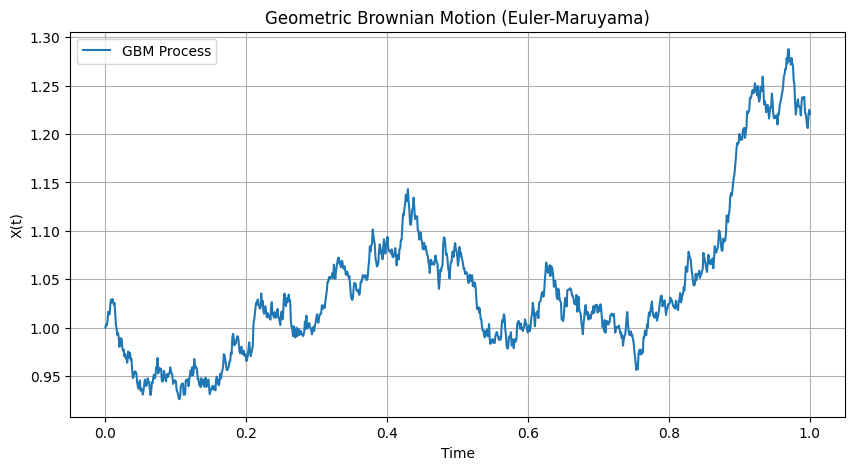

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
mu = 0.1       # ドリフト (成長率)
sigma = 0.2    # ボラティリティ (変動率)
X0 = 1.0       # 初期値
T = 1.0        # シミュレーション時間（1年間）
N = 1000       # 時間ステップ数
dt = T / N     # 時間刻み幅

# シミュレーション
t = np.linspace(0, T, N)  # 時間軸
X = np.zeros(N)  # 結果を格納する配列
X[0] = X0

np.random.seed(42)  # 乱数の再現性を確保
for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))  # ブラウン運動の増分
    X[i] = X[i-1] + mu * X[i-1] * dt + sigma * X[i-1] * dW  # Euler-Maruyama法

# 結果をプロット
plt.figure(figsize=(10,5))
plt.plot(t, X, label="GBM Process")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Geometric Brownian Motion (Euler-Maruyama)")
plt.legend()
plt.grid()
plt.show()


# Merton Jump Diffusion Model(Merton のジャンプ拡散モデル)

$
dS_t = \mu S_t dt + \sigma S_t dW_t + J_t S_t dN_t
$
- $J_t$ : ジャンプの大きさ (対数正規分布に従う)
- $N_t$ : ポアソン過程 (ジャンプの発生回数)

**特徴:**
- 株価の突然の大変動 (クラッシュ・急騰) をモデル化できる
- 株価リターンの裾の厚さ (ファットテール) を再現

---

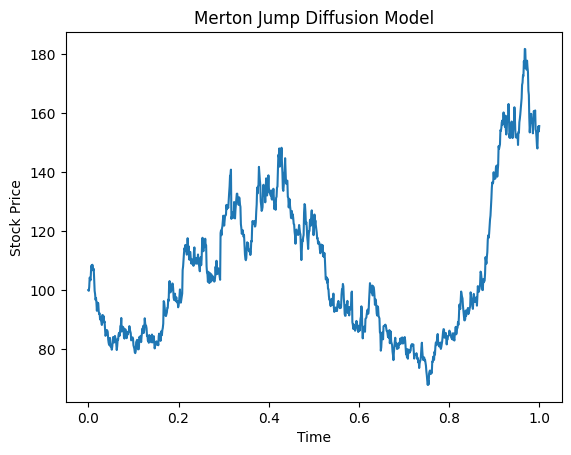

array([100.        ,  99.75377503, 101.08468903, 104.24243247,
       103.78653071, 103.33265675, 106.68042866, 108.36296855,
       107.38246756, 108.58661237, 107.61712307, 106.65135781,
       107.20087616, 103.20722052,  99.73737289,  98.65162549,
        96.70238705,  97.3412683 ,  95.61814013,  92.98298118,
        95.77765905,  95.37475566,  95.5323078 ,  92.87639546,
        91.8982396 ,  92.12997257,  90.06039077,  90.76687572,
        89.70994571,  89.21487318,  88.1741321 ,  91.52930524,
        91.53205624,  89.64299267,  91.15724041,  88.98511059,
        89.38441436,  86.72700789,  84.47888521,  84.83760068,
        86.12572784,  86.44734895,  86.27350843,  85.78125474,
        83.30679068,  82.14066319,  81.41181476,  83.17633327,
        83.7750489 ,  80.8968118 ,  81.44729253,  80.84667406,
        79.7834435 ,  80.78970417,  82.49762658,  84.07381194,
        82.6992701 ,  82.21407603,  82.78540661,  84.44181352,
        83.66152672,  83.37646168,  81.57634547,  79.67

In [20]:
def simulate_merton_jump(S0, mu, sigma, lambda_, jump_mu, jump_sigma, T, dt, N):
    np.random.seed(42)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(N) * np.sqrt(dt)
    N_t = np.random.poisson(lambda_ * dt, N)  # ポアソン過程
    J_t = np.random.normal(jump_mu, jump_sigma, N) * N_t  # ジャンプ大きさ

    S = np.zeros(N)
    S[0] = S0

    for i in range(1, N):
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W[i] + J_t[i])

    plt.plot(t, S)
    plt.title("Merton Jump Diffusion Model")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.show()
    return S

simulate_merton_jump(S0=100, mu=0.05, sigma=0.2, lambda_=1, jump_mu=-0.02, jump_sigma=0.1, T=1, dt=0.01, N=1000)


# Heston Model (確率的ボラティリティ)

$
dS_t = \mu S_t dt + \sqrt{V_t} S_t dW_t^S
$
$
dV_t = \kappa (\theta - V_t) dt + \sigma_v \sqrt{V_t} dW_t^V
$
- $V_t$ : 確率的ボラティリティ
- $\kappa$ : 平均回帰速度
- $\theta$ : 長期平均ボラティリティ
- $\sigma$ : ボラティリティのボラティリティ (Vol-of-Vol)

**特徴:**
- ボラティリティが一定ではなく、時間とともに変化する
- ブラック・ショールズモデルの仮定よりも実際の市場に近い

---

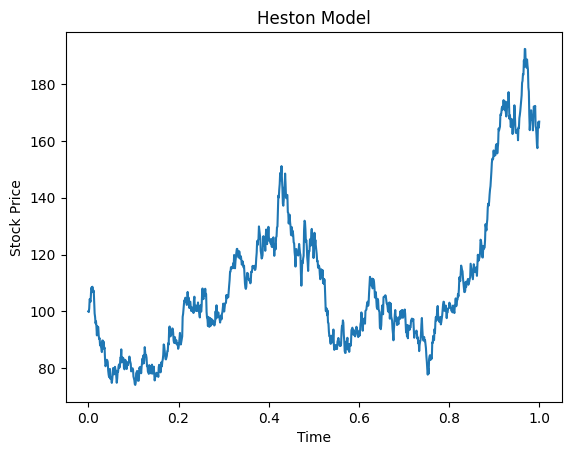

(array([100.        ,  99.75377503, 101.10848067, 104.29221334,
        103.85247331, 103.40567731, 106.74687991, 108.40720229,
        107.44328602, 108.66032549, 107.69922986, 106.70927045,
        107.27515066, 103.01759888,  99.25848856,  98.01399313,
         95.7721261 ,  96.49351564,  94.53933498,  91.54625523,
         94.77965183,  94.30777986,  94.47640552,  91.47038002,
         90.30005183,  90.56595342,  88.0347363 ,  88.88599485,
         87.58086328,  86.95311187,  85.67527609,  89.74448017,
         89.73584532,  87.53733684,  89.31488566,  86.79269566,
         87.25619543,  83.27352354,  80.673782  ,  81.08009865,
         82.59030111,  82.96024726,  82.74010965,  82.13483283,
         79.16816332,  77.74925631,  76.84212431,  79.00661011,
         79.70482334,  76.23071325,  76.89675716,  76.14553122,
         74.82444153,  76.05382387,  78.14533683,  80.03626346,
         78.40192361,  77.81251973,  78.48495848,  80.47012373,
         79.53295115,  79.1761645 ,  77.

In [21]:
def simulate_heston(S0, v0, mu, kappa, theta, sigma_v, rho, T, dt, N):
    np.random.seed(42)
    t = np.linspace(0, T, N)
    W_s = np.random.standard_normal(N) * np.sqrt(dt)
    W_v = rho * W_s + np.sqrt(1 - rho**2) * np.random.standard_normal(N) * np.sqrt(dt)

    S, v = np.zeros(N), np.zeros(N)
    S[0], v[0] = S0, v0

    for i in range(1, N):
        v[i] = np.maximum(v[i-1] + kappa * (theta - v[i-1]) * dt + sigma_v * np.sqrt(v[i-1]) * W_v[i], 0)
        S[i] = S[i-1] * np.exp((mu - 0.5 * v[i-1]) * dt + np.sqrt(v[i-1]) * W_s[i])

    plt.plot(t, S)
    plt.title("Heston Model")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.show()
    return S, v

simulate_heston(S0=100, v0=0.04, mu=0.05, kappa=2, theta=0.04, sigma_v=0.1, rho=-0.7, T=1, dt=0.01, N=1000)


# LIBOR Market Model (BGM)


$
dL_i(t) = \mu_i(t, L) dt + \sigma_i(t, L) dW_i(t)
$
- $L_i(t)$ : $i$ 期間のフォワード金利
- $\sigma_i(t, L)$ : フォワード金利のボラティリティ

**特徴:**
- フォワード金利のダイナミクスを直接モデル化
- 短期金利モデル (Vasicek, CIR) よりも柔軟

---

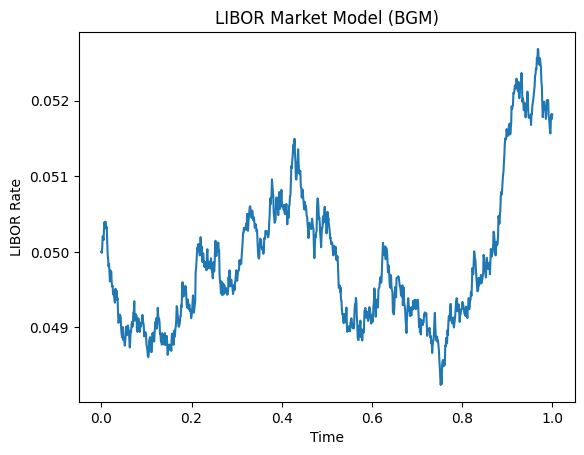

array([0.05      , 0.04998608, 0.05005077, 0.05020336, 0.05017975,
       0.05015616, 0.05031472, 0.05039191, 0.05034452, 0.05039907,
       0.05035228, 0.0503053 , 0.05032955, 0.05013723, 0.04996446,
       0.04990821, 0.04980711, 0.04983833, 0.0497478 , 0.04960738,
       0.04975291, 0.04973035, 0.04973697, 0.04959534, 0.04954128,
       0.04955217, 0.04943813, 0.04947519, 0.0494157 , 0.04938678,
       0.04932728, 0.04951026, 0.04950882, 0.0494041 , 0.04948535,
       0.04936457, 0.04938509, 0.04919182, 0.04906122, 0.04908044,
       0.04915289, 0.04916964, 0.04915817, 0.04912847, 0.04898332,
       0.04891275, 0.04886761, 0.04897094, 0.04900451, 0.04883192,
       0.04886348, 0.04882577, 0.04875961, 0.0488192 , 0.04891987,
       0.04901098, 0.04892868, 0.04889834, 0.04893065, 0.04902611,
       0.04897905, 0.04896077, 0.04885246, 0.04873562, 0.04881479,
       0.04894728, 0.04894013, 0.04903836, 0.04907374, 0.04901037,
       0.04904571, 0.04919671, 0.04919309, 0.04934717, 0.04908

In [22]:
def simulate_bgm(L0, sigma, T, dt, N):
    np.random.seed(42)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(N) * np.sqrt(dt)
    L = np.zeros(N)
    L[0] = L0

    for i in range(1, N):
        L[i] = L[i-1] * np.exp(-0.5 * sigma**2 * dt + sigma * W[i])

    plt.plot(t, L)
    plt.title("LIBOR Market Model (BGM)")
    plt.xlabel("Time")
    plt.ylabel("LIBOR Rate")
    plt.show()
    return L

simulate_bgm(L0=0.05, sigma=0.02, T=1, dt=0.01, N=1000)


# GARCH


**モデル式:**
$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$
- $\sigma_t^2$ : 条件付き分散 (ボラティリティの2乗)
- $\epsilon_t$ : ホワイトノイズ
- $\alpha_0, \alpha_1, \beta_1$ : モデルパラメータ

**特徴:**
- 金融時系列のボラティリティ・クラスタリングを表現可能
- **ARCH/GARCH モデルはリスク管理やオプションプライシングに重要**

---

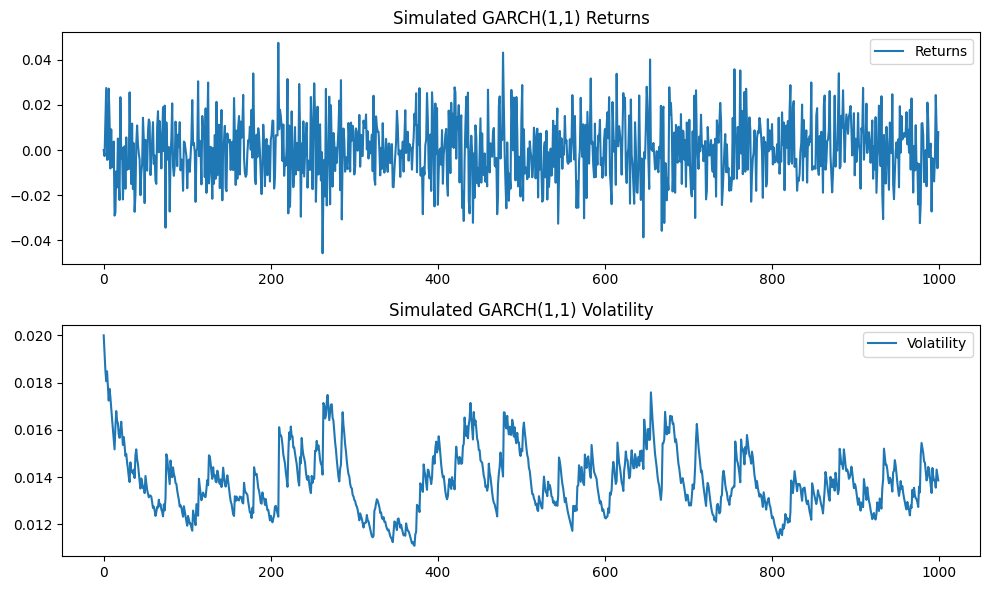

(array([ 0.00000000e+00, -2.65956694e-03,  1.20015422e-02,  2.75083035e-02,
        -4.32666698e-03, -4.17674428e-03,  2.72282932e-02,  1.36123365e-02,
        -8.16426972e-03,  9.16767543e-03, -7.63110089e-03, -7.46560113e-03,
         3.77994843e-03, -2.90389178e-02, -2.77859218e-02, -9.44475118e-03,
        -1.65926921e-02,  5.11859755e-03, -1.43597579e-02, -2.21237626e-02,
         2.34195149e-02, -3.69071800e-03,  1.07022488e-03, -2.18927971e-02,
        -8.54645424e-03,  1.70212761e-03, -1.71522020e-02,  5.63014256e-03,
        -8.78047123e-03, -4.18849103e-03, -8.43345695e-03,  2.55558648e-02,
        -1.97436473e-04, -1.50544885e-02,  1.17383382e-02, -1.72730383e-02,
         2.99104423e-03, -2.73665659e-02, -1.98323855e-02,  2.98770600e-03,
         1.08969648e-02,  2.49461979e-03, -1.63971391e-03, -4.16199105e-03,
        -1.99912490e-02, -1.00397165e-02, -6.35127901e-03,  1.43049589e-02,
         4.67415201e-03, -2.34970060e-02,  4.55412012e-03, -5.29060211e-03,
        -9.1

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_garch(alpha0, alpha1, beta1, T, sigma0=0.02):
    np.random.seed(42)
    z = np.random.normal(0, 1, T)  # 標準正規乱数
    sigma2 = np.zeros(T)  # 分散
    r = np.zeros(T)  # リターン
    
    sigma2[0] = sigma0**2  # 初期分散
    
    for t in range(1, T):
        sigma2[t] = alpha0 + alpha1 * (r[t-1] ** 2) + beta1 * sigma2[t-1]
        sigma_t = np.sqrt(sigma2[t])
        r[t] = sigma_t * z[t]
    
    # プロット
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))
    
    ax[0].plot(r, label="Returns")
    ax[0].set_title("Simulated GARCH(1,1) Returns")
    ax[0].legend()
    
    ax[1].plot(np.sqrt(sigma2), label="Volatility")
    ax[1].set_title("Simulated GARCH(1,1) Volatility")
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return r, np.sqrt(sigma2)

# パラメータの設定
alpha0 = 0.00001
alpha1 = 0.05
beta1 = 0.9
T = 1000

simulate_garch(alpha0, alpha1, beta1, T)


# Merton Credit Risk Model

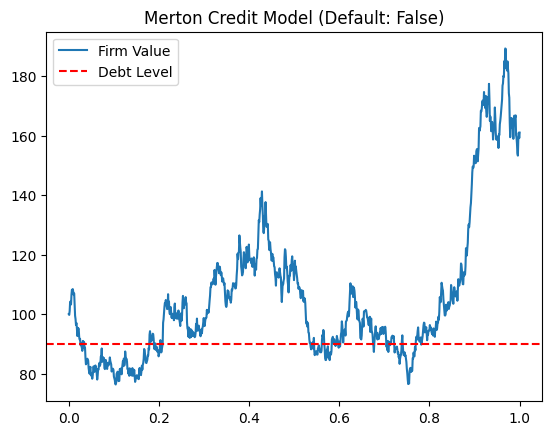

(array([100.        ,  99.73382627, 101.04426324, 104.17990577,
        103.70353469, 103.22937574, 106.55248893, 108.21136654,
        107.21079298, 108.39133228, 107.40210392, 106.41698273,
        106.94390255, 102.93923028,  99.45849886,  98.3561141 ,
         96.393434  ,  97.01086998,  95.27453369,  92.63031634,
         95.39531362,  94.97502172,  95.11288904,  92.45014517,
         91.45818503,  91.67047242,  89.59329225,  90.27805559,
         89.20897405,  88.69892462,  87.64667127,  90.96357911,
         90.94812167,  89.05329705,  90.53947397,  88.36438988,
         88.74315787,  85.34082359,  83.11200928,  83.44822938,
         84.69831975,  84.99760923,  84.80972042,  84.30895523,
         81.86058767,  80.69856279,  79.96651547,  81.68337028,
         82.25488671,  79.41299324,  79.93738791,  79.33203596,
         78.27306853,  79.24442927,  80.90350172,  82.43274181,
         81.06881481,  80.57706954,  81.12079829,  82.72735186,
         81.94651665,  81.65096344,  79.

In [24]:
def simulate_merton_credit(V0, mu, sigma, B, T, dt, N):
    np.random.seed(42)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(N) * np.sqrt(dt)
    V = np.zeros(N)
    V[0] = V0

    for i in range(1, N):
        V[i] = V[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W[i])

    default = V[-1] < B
    plt.plot(t, V, label="Firm Value")
    plt.axhline(B, color='r', linestyle='--', label="Debt Level")
    plt.title(f"Merton Credit Model (Default: {default})")
    plt.legend()
    plt.show()
    return V, default

simulate_merton_credit(V0=100, mu=0.03, sigma=0.2, B=90, T=1, dt=0.01, N=1000)


# Cox過程 (Hawkes Process)

Hawkes過程は、自己励起型のポアソン過程であり、取引データの到着時間や信用リスクのモデリングなどで使われます。

λ(t)（発生率）が過去のイベントの影響を受けて変化するのが特徴 です。

**モデル式:**
$
\lambda(t) = \mu + \alpha \sum_{t_i < t} e^{-\beta (t - t_i)}
$
- $\lambda(t)$ : 時刻 $t$ での到着率
- $\mu$ : 基本発生率
- $\alpha$ : 自己励起の強さ
- $\beta$ : 減衰率

**特徴:**
- **取引の出来高や信用リスクのイベント発生モデルに応用**
- 過去のイベントが未来の発生率を高める

---

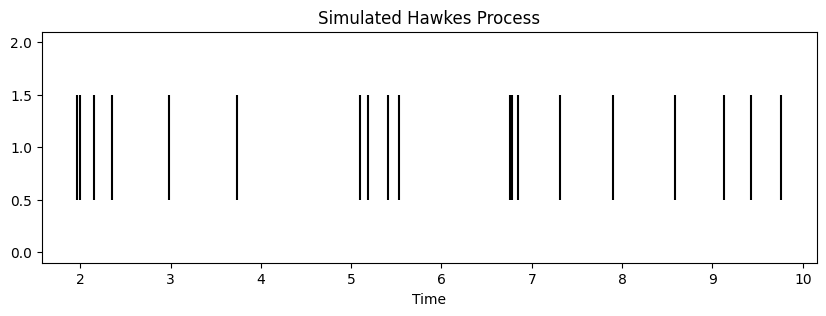

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes(mu, alpha, beta, T):
    """
    Hawkes Process のシミュレーション
    mu: 基本発生率
    alpha: 自己励起の強さ
    beta: 減衰率
    T: シミュレーション時間
    """
    np.random.seed(42)
    events = []
    t = 0
    lambda_t = mu
    
    while t < T:
        u = np.random.uniform()
        tau = -np.log(u) / lambda_t  # 次のイベントまでの待ち時間
        t += tau
        
        if t > T:
            break
        
        events.append(t)
        lambda_t = mu + alpha * sum(np.exp(-beta * (t - np.array(events))))
    
    return np.array(events)

# パラメータ設定
mu = 0.5    # 基本発生率
alpha = 0.8 # 自己励起の強さ
beta = 1.2  # 減衰率
T = 10      # シミュレーション時間

events = simulate_hawkes(mu, alpha, beta, T)

# プロット
plt.figure(figsize=(10, 3))
plt.eventplot(events, lineoffsets=1, colors='black')
plt.xlabel("Time")
plt.title("Simulated Hawkes Process")
plt.show()


# Ornstein-Uhlenbeck Process (平均回帰過程)

Ornstein-Uhlenbeck過程は、株価や金利のように「平均へ回帰する」確率過程をモデル化するのに使われます。

$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$
- $\theta$ : 平均回帰速度
- $\mu$ : 平均水準
- $\sigma$ : ボラティリティ

**特徴:**
- **金利やボラティリティのモデルに適用**
- 平均値 $\mu$ に向かって動く

---

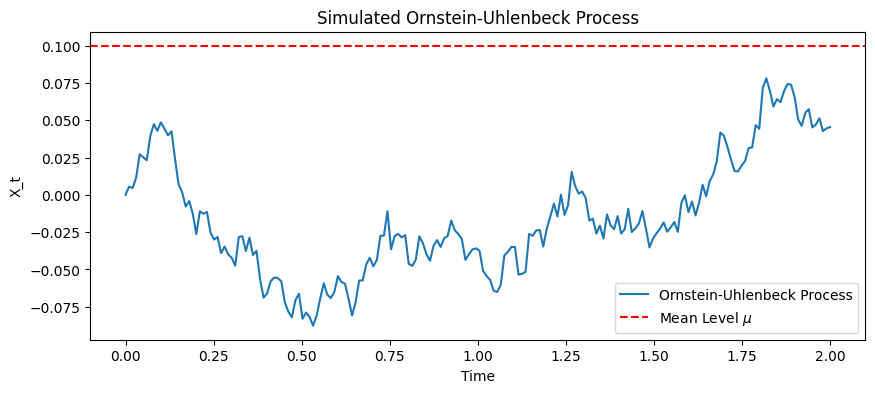

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ou(theta, mu, sigma, X0, T, dt=0.01):
    """
    Ornstein-Uhlenbeck Process のシミュレーション
    theta: 平均回帰速度
    mu: 平均水準
    sigma: ボラティリティ
    X0: 初期値
    T: シミュレーション時間
    dt: タイムステップ
    """
    np.random.seed(42)
    N = int(T / dt)
    X = np.zeros(N)
    X[0] = X0
    t = np.linspace(0, T, N)
    
    for i in range(1, N):
        dW = np.sqrt(dt) * np.random.normal()
        X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * dW

    return t, X

# パラメータ設定
theta = 0.5  # 平均回帰速度
mu = 0.1     # 平均水準
sigma = 0.1  # ボラティリティ
X0 = 0.0     # 初期値
T = 2        # シミュレーション時間
dt = 0.01    # タイムステップ

t, X = simulate_ou(theta, mu, sigma, X0, T, dt)

# プロット
plt.figure(figsize=(10, 4))
plt.plot(t, X, label="Ornstein-Uhlenbeck Process")
plt.axhline(mu, color='red', linestyle='--', label="Mean Level $\mu$")
plt.xlabel("Time")
plt.ylabel("X_t")
plt.legend()
plt.title("Simulated Ornstein-Uhlenbeck Process")
plt.show()


# 次に学ぶべき内容

あなたの目標や興味に応じていくつかの選択肢がありますが、特に金融工学とプログラミングに関連する分野で次のステップとして有用な内容をいくつか提案します：

1. 確率微分方程式（SDE）の深堀り

現在、SDEに関連するモデルを学んでいるので、さらに詳細な理論や応用に進むことができます。例えば：

- Stochastic Calculus（確率微積分）：SDEの解析に必要な確率微積分を深堀りすると、より高度な金融モデリングが可能になります。Itoの補題やFokker-Planck方程式などを学び、解法を手に入れることができます。
- 解の存在と一意性：特に金融市場での複雑なモデルにおいては、解の存在と一意性を確保することが重要です。

2. 数値解法の学習

SDEを解析的に解くことは困難な場合が多いため、数値解法を学ぶことが非常に役立ちます：

- Euler-Maruyama法：既に少し触れたと思いますが、より多くの数値解法（Runge-Kutta法、Milstein法など）を学ぶと、より精度の高いシミュレーションが可能になります。
- モンテカルロ法：特にオプション価格付けやリスク評価に使われるモンテカルロシミュレーションの深堀り。確率過程のシミュレーションにおける効率化（例：クラスターサンプリングやアンシラリーサンプリング）を学ぶ。

3. 金融工学の応用

オプション価格理論の深化：Black-Scholes式に加え、アメリカンオプションや複雑なデリバティブ商品（例えば、バリアオプション、ストラドル、ストラングルなど）について学ぶ。
信用リスクとクレジットデリバティブ：MertonモデルやCox-Ingersoll-Ross (CIR) プロセスを使った信用リスクのモデリング。**CDS（クレジット・デフォルト・スワップ）**などについて学ぶ。

4. マシンラーニングと金融工学の融合

金融の世界では、機械学習やデータ分析がますます重要になっています。特に、クオンツ分析やアルゴリズム取引に関して、次の内容を学ぶと有用です：

金融データの分析：時系列データの前処理と分析（例えば、ARIMAモデルやLSTMなどのディープラーニング技術を使った予測）。
強化学習（Reinforcement Learning）：金融市場での意思決定問題において、ポートフォリオ最適化やアルゴリズム取引に強化学習を適用する方法を学ぶ。

5. 数理ファイナンスの進化

最適ポートフォリオ理論（Markowitzの最適化理論やCAPMの応用）
金融リスク管理（VaR、CVaR、ストレステスト、モンテカルロ法によるリスク評価）

6. 実際の市場データでの実験

実際の市場データを使って学ぶことも重要です。以下のようなステップがあります：

データ収集と解析：Yahoo Finance APIやQuandlを使って金融データを収集し、Pythonで解析を行う。
シミュレーション実験：モデルのパラメータを変更し、どのように価格が変動するかをシミュレーションして結果を観察する。

## 次のステップの提案

- 金融工学における確率微分方程式（SDE）の理論を深堀りする
  - 次に、SDEの理論をより詳細に学ぶと、より複雑なモデルや実務に応用できるようになります。例えば、確率微積分や確率過程の理論を学んで、より多くの金融工学の問題に取り組む準備ができます。

- モンテカルロ法や数値解法をマスターし、シミュレーションの精度を上げる
  - これにより、ブラック・ショールズモデルやHestonモデルなどを使ったオプション価格付け、リスク管理をより効率的に行えるようになります。

あなたの興味がある分野（例えば、金融工学、機械学習、またはモデルの実装）に関連する次のステップを選んで、深堀りしていくとよいでしょう。